#배경: 2018년 보험 회계 기준(IFRS) 변경에 따라 언론사에서 파급효과에 따라 다수의 부정 기사를 쏟아내고 있음
#주제: IFRS 키워드로 조회된 기사들에서 주로 제기되는 문제점을 정리해 미디어 위기 대응 Statement에 활용 
#데이터: IFRS 키워드 기사 100건
#가설: 언론사에 IFRS 변경 관련한 빈번 키워드를 단순 빈도 분석,연관성분석으로 수치적으로 분석할 수 있고 유의미한 관계를 발견할 수 잏을 것이다.
#예상되는 결과: 시각으로 확인할 수 있는 빈도 분석 결과 외에 연관성 분석은 단어별 상관도를 통해 관계를 알 수 있음
#행동 계획: 파이썬을 이용해 IFRS  키워드 기사 100건 취합 후 단순 빈도 분석,연관성분석

In [1]:
import requests

In [60]:
import lxml.html

In [107]:
import csv

In [4]:
url='http://news.naver.com/main/search/search.nhn?refresh=&so=datetime.dsc&stPhoto=&stPaper=&stRelease=&ie=MS949&detail=0&rcsection=&query=ifrs&x=0&y=0&sm=all.basic&pd=1&startDate=&endDate='

In [5]:
with open('news2.csv', 'w', encoding='utf8') as f:
    writer = csv.writer(f)
    for i in range(1, 100):
        res = requests.get(url.format(i))  # 기사 목록
        element = lxml.html.fromstring(res.text)
        for news_link in element.xpath('.//a[@class="go_naver"]'):
            try:
                res = requests.get(news_link.attrib['href'])   # 네이버 뉴스 링크
                news = lxml.html.fromstring(res.text)
                body = news.xpath('.//div[@id="articleBodyContents"]')[0]
                writer.writerow([body.text_content()])
            except:
                continue

In [62]:
import csv

In [63]:
news = []
with open('news2.csv', encoding='utf8', newline='\r\n') as f:
    reader = csv.reader(f)
    for row in reader:
        news.append(row[0])

In [ ]:
#크롤링한 기사 테스트가 잘 들어왔는지 확인

In [67]:
news[15]

'\r\r\n\t\r\r\n\t\r\r\n\t저금리에 역마진 비상［헤럴드경제=한희라 기자］저금리에 따른 역마진 우려에 저축성 보험이 갈수록 줄고 있다. 마이너스금리에 들어선 일본 보험사들이 저축성 보험 판매를 중단하고 있는 것처럼 저금리가 심화되고 있는 우리나라에서도 저축성 보험이 종적을 감출 수 있다는 전망이 나오고 있다.보험업계에 따르면 금리 역마진과 새 보험회계기준 IFRS4 도입에 따른 자본 확충 부담 때문에 저축성보험 판매가 감소하고 있는 것으로 나타났다.생명보험사의 저축성보험 신계약건수는 지난해 1분기 118만6922건에서 올해 1분기 95만2754건으로 감소했다. 최대 보험사인 삼성생명의 경우 이 기간 저축성보험 신계약건수가 26만6633건에서 12만4587건으로 절반이 넘게 줄었다. 미래에셋생명도 6만4708건에서 3만5035건으로 절반 가량 감소했다. 다른 보험사들도 규모의 차이는 있지만 대부분 감소했다.\xa0다만 동양생명은 같은 기간 저축성보험 신계약건수가 2만9009건에서 6만8359건으로 3배 가까이 증가했다. 중국 안방보험에 인수된 이후 ‘몸집 불리기’ 작업의 일환으로 분석된다.보험사들이 저축성보험을 줄이는 것은 역마진 우려 때문이다. 금리가 계속 떨어지는 상황에서 수익성이 높은 보장성 보험 위주로 체질 개선을해가는 과정에 있다.2020년 도입 예정인 IFRS4 2단계도 저축성보험을 줄이는 이유 가운데 하나다. 새 회계기준이 적용되면 생명보험사들은 보유중인 저축성보험 계약으로 인해 대규모의 책임준비금을 확보해야 한다. 현재는 저축성보험료를 전액 매출로 합산하지만 새 회계기준에서는 은행 예ㆍ적금과 같이 부채로 평가돼 준비해야 할 금액이 늘어나기 때문이다.생보업계 한 관계자는 “생보사는 기준금리 인하 뿐 아니라 IFRS4 2단계 도입에 따라 저축성 보험 판매는 도움이 되지 않는다”며 “저축성 보험의 금리경쟁은 사실상 끝난 상황”이라고 말했다. 이를 반영하듯 저축성보험의 적립금에 적용되는 보험사의 공시이율은 계속 떨어지고 있다. 보험사의 6

In [ ]:
#형태소 분석

In [68]:
from konlpy.tag import Twitter

In [69]:
tagger = Twitter()

In [70]:
from sklearn.feature_extraction.text import CountVectorizer

In [71]:
cv = CountVectorizer(tokenizer=tagger.nouns, max_features=50)

In [72]:
tdf = cv.fit_transform(news)

In [73]:
tdf

<594x50 sparse matrix of type '<class 'numpy.int64'>'
	with 14256 stored elements in Compressed Sparse Row format>

In [74]:
words = cv.get_feature_names()

In [75]:
words

['가격',
 '건',
 '것',
 '고',
 '관계자',
 '금',
 '금리',
 '금융',
 '기업',
 '기자',
 '기준',
 '년',
 '노조',
 '당국',
 '대손',
 '도입',
 '동결',
 '등',
 '만',
 '및',
 '보험',
 '보험사',
 '분할',
 '상황',
 '수',
 '시장',
 '안',
 '액면',
 '억원',
 '업계',
 '역마',
 '올해',
 '월',
 '은행',
 '임금',
 '자동차',
 '자산',
 '재',
 '저축',
 '주가',
 '준비',
 '지난해',
 '천',
 '충당금',
 '토지',
 '평가',
 '해외',
 '회계',
 '회계기준',
 '회사']

In [ ]:
#1개 단어는 삭제

In [76]:
def get_word(doc):
    nouns = tagger.nouns(doc)
    return [noun for noun in nouns if len(noun) > 1]

In [77]:
cv = CountVectorizer(tokenizer=get_word, max_features=50)

In [78]:
tdf = cv.fit_transform(news)

In [79]:
words = cv.get_feature_names()

In [80]:
words

['가격',
 '계약',
 '관계자',
 '국내',
 '금리',
 '금융',
 '기업',
 '기자',
 '기준',
 '노조',
 '뉴스',
 '당국',
 '대손',
 '도입',
 '동결',
 '때문',
 '만원',
 '보험',
 '보험사',
 '분할',
 '사이버',
 '삼성',
 '상품',
 '상황',
 '시장',
 '액면',
 '억원',
 '업계',
 '역마',
 '올해',
 '은행',
 '이율',
 '이익',
 '임금',
 '자동차',
 '자산',
 '저축',
 '주가',
 '준비',
 '지난해',
 '충당금',
 '토지',
 '판매',
 '평가',
 '하락',
 '항목',
 '해외',
 '회계',
 '회계기준',
 '회사']

In [ ]:
#워드클라우드 생성을 위한 정제 작업

In [81]:
import numpy

In [82]:
count_mat = tdf.sum(axis=0)

In [83]:
count_mat

matrix([[ 891,  594,  792,  693, 1980, 1386,  990,  792,  891,  990,  594,
         1188,  891, 1386,  792,  693,  693, 4059, 2178,  990,  594,  594,
          792,  990, 1287,  990, 1683,  891,  792,  891, 1881,  693,  693,
         1683,  990, 1683, 1683,  990,  990, 1089,  990,  891,  693,  990,
          594,  594,  990,  990,  891, 1287]], dtype=int64)

In [84]:
count = numpy.squeeze(numpy.asarray(count_mat))

In [85]:
count

array([ 891,  594,  792,  693, 1980, 1386,  990,  792,  891,  990,  594,
       1188,  891, 1386,  792,  693,  693, 4059, 2178,  990,  594,  594,
        792,  990, 1287,  990, 1683,  891,  792,  891, 1881,  693,  693,
       1683,  990, 1683, 1683,  990,  990, 1089,  990,  891,  693,  990,
        594,  594,  990,  990,  891, 1287], dtype=int64)

In [86]:
word_count = list(zip(words, count))

In [87]:
word_count

[('가격', 891),
 ('계약', 594),
 ('관계자', 792),
 ('국내', 693),
 ('금리', 1980),
 ('금융', 1386),
 ('기업', 990),
 ('기자', 792),
 ('기준', 891),
 ('노조', 990),
 ('뉴스', 594),
 ('당국', 1188),
 ('대손', 891),
 ('도입', 1386),
 ('동결', 792),
 ('때문', 693),
 ('만원', 693),
 ('보험', 4059),
 ('보험사', 2178),
 ('분할', 990),
 ('사이버', 594),
 ('삼성', 594),
 ('상품', 792),
 ('상황', 990),
 ('시장', 1287),
 ('액면', 990),
 ('억원', 1683),
 ('업계', 891),
 ('역마', 792),
 ('올해', 891),
 ('은행', 1881),
 ('이율', 693),
 ('이익', 693),
 ('임금', 1683),
 ('자동차', 990),
 ('자산', 1683),
 ('저축', 1683),
 ('주가', 990),
 ('준비', 990),
 ('지난해', 1089),
 ('충당금', 990),
 ('토지', 891),
 ('판매', 693),
 ('평가', 990),
 ('하락', 594),
 ('항목', 594),
 ('해외', 990),
 ('회계', 990),
 ('회계기준', 891),
 ('회사', 1287)]

In [ ]:
#단어별 출현 빈도 확인

In [88]:
import operator

In [89]:
sorted(word_count, key=operator.itemgetter(1), reverse=True)

[('보험', 4059),
 ('보험사', 2178),
 ('금리', 1980),
 ('은행', 1881),
 ('억원', 1683),
 ('임금', 1683),
 ('자산', 1683),
 ('저축', 1683),
 ('금융', 1386),
 ('도입', 1386),
 ('시장', 1287),
 ('회사', 1287),
 ('당국', 1188),
 ('지난해', 1089),
 ('기업', 990),
 ('노조', 990),
 ('분할', 990),
 ('상황', 990),
 ('액면', 990),
 ('자동차', 990),
 ('주가', 990),
 ('준비', 990),
 ('충당금', 990),
 ('평가', 990),
 ('해외', 990),
 ('회계', 990),
 ('가격', 891),
 ('기준', 891),
 ('대손', 891),
 ('업계', 891),
 ('올해', 891),
 ('토지', 891),
 ('회계기준', 891),
 ('관계자', 792),
 ('기자', 792),
 ('동결', 792),
 ('상품', 792),
 ('역마', 792),
 ('국내', 693),
 ('때문', 693),
 ('만원', 693),
 ('이율', 693),
 ('이익', 693),
 ('판매', 693),
 ('계약', 594),
 ('뉴스', 594),
 ('사이버', 594),
 ('삼성', 594),
 ('하락', 594),
 ('항목', 594)]

In [90]:
%matplotlib inline

In [91]:
from wordcloud import WordCloud

In [92]:
from matplotlib import pyplot

In [ ]:
#워드클라우드 생성을 통해 단순 빈도 분석 가능

In [93]:
wc = WordCloud(font_path='C:\\Windows\\Fonts\\malgun.ttf', background_color='white', width=400, height=300)
cloud = wc.generate_from_frequencies(word_count)

In [111]:
# 빈도 분석 실시
# 보험,보험사: 가장 영향을 많이 받는 기관인 보험사가 최다 언급
# 금리:가장 중요한 지표인 금리를 2번째로 많이 언급 
# 충당금, 회계기준, 저축, 당국 등: 주요하게 살펴야 할 전문 용어들이 분류됨

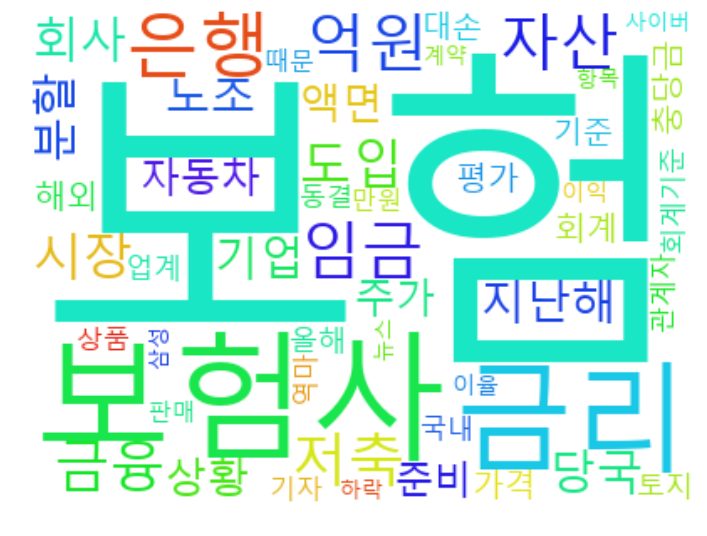

In [94]:
pyplot.figure(figsize=(12, 9))
pyplot.imshow(cloud)
pyplot.axis("off")
pyplot.show()

In [ ]:
#연관성 분석을 위한 단어간 상관관계 확인

In [95]:
word_corr = numpy.corrcoef(tdf.todense(), rowvar=0)

In [96]:
word_corr

array([[ 1.        , -0.0402259 , -0.49670531, ...,  0.39852264,
        -0.6833023 , -0.29409882],
       [-0.0402259 ,  1.        ,  0.25724788, ...,  0.        ,
         0.61545745, -0.4281322 ],
       [-0.49670531,  0.25724788,  1.        , ...,  0.23320381,
         0.3799803 ,  0.42924839],
       ..., 
       [ 0.39852264,  0.        ,  0.23320381, ...,  1.        ,
        -0.21520264, -0.41583875],
       [-0.6833023 ,  0.61545745,  0.3799803 , ..., -0.21520264,
         1.        , -0.26755096],
       [-0.29409882, -0.4281322 ,  0.42924839, ..., -0.41583875,
        -0.26755096,  1.        ]])

In [97]:
edges = []
for i in range(len(words)):
    for j in range(i + 1, len(words)):
        edges.append((words[i], words[j], word_corr[i, j]))

In [98]:
edges = sorted(edges, key=operator.itemgetter(2), reverse=True)

In [99]:
edges = edges[:50]

In [100]:
edge_list = [(word1, word2) for word1, word2, weight in edges]
weight_list = [weight for word1, word2, weight in edges]

In [101]:
import networkx

In [102]:
G = networkx.Graph()

edge_set = set()
for word1, word2, weight in edges:
    G.add_edge(word1, word2, weight=weight)
    edge_set.add((word1, word2))

# 단어 연관성 분석을 통한 인사이트 도출
# Insight1. 금융 당국의 경우 충당금, 대손, 기준, 은행과 연관성이 높음. 금융당국 언급 시 관련 주의가 필요
# Insight2. 저축 이율의 역마진이 실제로 IFRS의 최대 리스크로 데이터를 통해 확인할 수 있었음

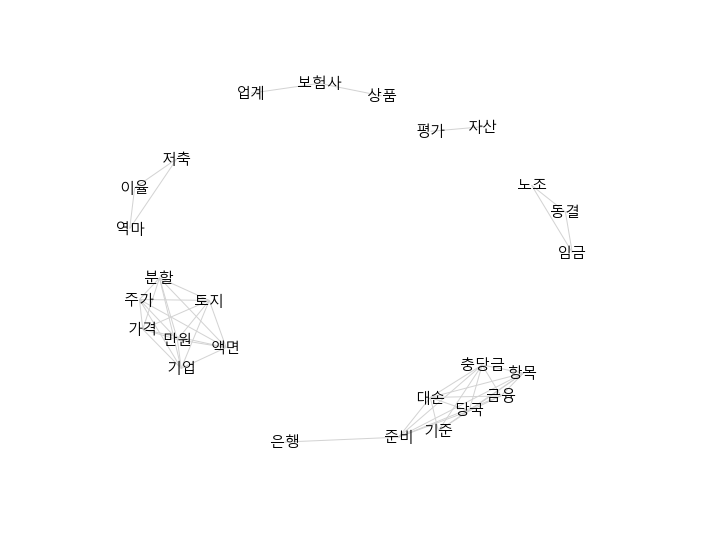

In [106]:
position = networkx.spring_layout(G, iterations=30)
pyplot.figure(figsize=(12, 9))
networkx.draw_networkx_nodes(G, position, node_size=0)
networkx.draw_networkx_edges(G, position, edgelist=edge_list, width=weight_list, edge_color='lightgray')
networkx.draw_networkx_labels(G, position, font_size=15, font_family='Malgun Gothic')
plt.axis('off')
pyplot.show()